# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2021-s109a/blob/master/lectures/crest.png?raw=true"> CS-S109A Introduction to Data Science 

## Final Exam: COVID-19 Modeling

**Harvard University**<br/>
**Summer 2021**<br/>
**Instructors**: Kevin Rader


<hr style='height:2px'>

---



### INSTRUCTIONS

- This final exam is to be completed indivudally.  Do not consult with your peers when working on it (you can aks the teaching staff for clarification questions, including private messages on Ed).
- To submit your assignment follow the instructions given in Canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

**Note: for all problems, it is up to you to decide how to transform the data (standardization, log transformations, etc.).  Be sure you use and interpret theses transformations approporiately.**

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import statsmodels as sm
import matplotlib.pyplot as plt
import seaborn as sns

# You are free to use any functions/methods within these packages (BS4, ELI5, and LIME are fine too)
# if you would like to use any other, please contact hte teaching staff 

<hr style="height:2pt">

# Analyzing the recent spread of COVID-19 

![](fig/vaccine.jpeg)

You are tasked with using the COVID case and vaccination data across counties presented by the CDC to analyze the recent surge in COVID infections and the association with (amonth other predictors).  You are also tasked with building prediction models to forecast how the disease spread will change based on data from the previous week (and  demographic and other measures.

The exam broken into 4 problems:
- Problem 1: Data Wrangling and Explorations
- Problem 2: Interpretive Linear Regression Modeling
- Problem 3: Prediction Modeling
- Problem 4: Further Analysis

You are provided with four raw data files, and a 5th cleaned file is provided to be used for all EDA and modeling tasks.

The variables included in each of the four raw data sets are:

For 'covid_cases_county.csv' (note: counties show up many times in this dataset: once for each data they report the number of cases):
- `date`: the date of the measurement, taken weekly
- `county`: county name
- `state`: the state in which the county lies
- `fips`: the unique Federal Information Processing System (FIPS) codes for the county
- `cases`: the cumulative number of confirmed positive cases up to and including that date
- `deaths`: the cumulative number of confirmed COVID-related deaths up to and including that date


For 'vaccines_county.csv' (note: counties show up many times in this dataset: once for each data they report the number of cases):
- `date`: the date of the measurement, taken weekly
- `fips`: the unique FIPS code for the county
- `fully`: the percent of residents that are fully vaccinated in the county on that date
- `dose1`: the percent of residents that have received at least one vaccine dose in the county on that date.

For 'masks_county.csv' (note: this is based on a survey conducted by the New York Times in summer of 2020):
- `fips`: the unique FIPS code for the county
- `never`: the percent of respondents that report they never wore masks in public
- `rarely`: the percent of respondents that report they rarely wore masks in public
- `sometimes`: the percent of respondents that report they sometimes wore masks in public	
- `frequently`: the percent of respondents that report they frequently wore masks in public	
- `always`: the percent of respondents that report they always wore masks in public

For 'demographics_county.csv' (note: these are various measures taken from 2010 to 2020):
- `fips`: the unique FIPS code for the county
- `population`: total number of residents in the country	
- `hispanic`: the percentage of residents that self-identify as hispanic
- `minority`: the percentage of residents that self-identify as a minority group (non-white)
- `female`: the percentage of residents that self-identify as female
- `unemployed`: the percentage of residents that are unemployed
- `income`: the median household income, in thousnads of dollards
- `nodegree`: the percentage of residents that report not having graduated high school
- `bachelor`: the percentage of residents that report having a college degree
- `inactivity`: the percentage of residents that get less than 1 hour of vigorous exercise a week
- `obesity`: the percentage of residents that are considered obese based on BMI
- `density`: the population density (residents per square mile)
- `votergap20`: Biden voting percentage minus Trump voting percentage in the 2020 election
- `votergap16`: Clinton voting percentage minus Trump voting percentage in the 2016 election


### Data Sources
- Vaccinations [here](https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-County/8xkx-amqh).
- Cases [here](https://github.com/nytimes/covid-19-data).
- Mask Usage [here](https://github.com/nytimes/covid-19-data/tree/master/mask-use).
- Demographics [here](https://www.ers.usda.gov/data-products/county-level-data-sets/) 
- 2020 Election [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ)



## Question 1 [25pts]: Data Wrangling and Explorations </b></div>

**1.1** Load the data sets as follows:
- 'covid_cases_county.csv' as `covid_raw` 
- 'vaccines_county.csv' as `vaccines_raw`
- 'masks_county.csv' as `masks`
- 'demographics_county.csv' as `demo` 

**1.2** Create a subset of the `covid_raw` data frame that only contains the measures for 5 dates: June 27 and July 4, 11, 18 and 25.  Do the same for the `vaccines_raw`.  Call these subsets `covid` and `vaccines`, respectively, and print out their dimensions (aka, shapes).

**1.3** Determine and print the number of counties that are measured for each time period in `covid` and `vaccines` (do not print out the list of counties, just the number/count).  Comment on what this implies for presence of missing data.

**1.4** Process both `covid` and `vaccines` so that each county is represented by a single row in each data frame (rather than having 5 separate rows for each county: 1 for each time period in part 1.2).  Call these new generate Pandas data frames `covid_by_county` and `vaccines_by_county` separately.  Print out the dimensions of each resulting data frame, and view the header of `covid_by_county`.  Note: you should use informative names for the columns in the resulting data frames: for example, `cases_w30` for the cumulative number of cases on July 25 (it's the 30th week of the calendar year).

**Hint**: Splitting based on dates and then using `pd.DataFrame.merge` (source)[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html] could be helpful for this task using the `fips` code as the keys to join on (you should drop any counties that are not measured in all time periods...the default argument for `how` in `pd.DataFrame.merge` will behave this way).

**1.5** Merge the 4 data fames (`covid_by_county`, `vaccines_by_county`, `masks`, and `demo`) based on `fips` and save the result as `covid_merged` (you should drop any counties that are not measured in all 4 data frames).  Determine and report how many counties were dropped from `demo` in this process, and view the header of `covid_merged`.

**1.6** Use `covid_merged` to calculate the novel case rate (per 1000 residents) for each of the weeks for all of the counties, and save these as 4 new well-named variables in `covid_merged`.  For example, `rate_w30` can mathematically be represented as `1000*(cases_30-cases_29)/population`.  Plot the histogram of the novel case rate in week 29, `rate_w29`, and comment on what you notice.

**1.7** We did the steps above (and some other minimal processing) and saved the results in `covid_clean.csv` for you.  Use this data file to answer some exploratory questions and all future analyses: 

1. Has the overall average case rate increased from week 28 (July 5-11) to week 29 (July 12-18)?  
2. Treating the counties as separate and equal observations: in what states did the case rate increase the most?  In what states did the case rate decrease the most (or increse the least)?  List the top 5 for each.  Do you notice any patterns in these states?
3. Create and interpret separate visuals to display how the country case rate in week 29 relates to each of the following variables. Interpret what you see (be specific to this domain).

    a. The political views in the county (as measured by the votergap in the 2020 election).
    
    b. The vaccination rate in the county (for week 28) (be sure to throw away the zeros as these represent unreported values).
    
    c. The population density of the county.
    
    d. Whether 50% or more of the surveyed residents in the county report that they always wore a mask in public at the time of the survey.

## Answers

**1.1** Load the data sets as follows:
- 'covid_cases_county.csv' as `covid_raw` 
- 'vaccines_county.csv' as `vaccines_raw`
- 'masks_county.csv' as `masks`
- 'demographics_county.csv' as `demo` 

Print out each of their dimensions (aka, shapes).

In [3]:
# Load data
covid_raw = pd.read_csv('data/covid_cases_county.csv')
vaccines_raw = pd.read_csv('data/vaccines_county.csv')
masks = pd.read_csv('data/masks_county.csv')
demo = pd.read_csv('data/demographics_county.csv')

# print shapes of the datasets
print(covid_raw.shape[1],"columns and ",covid_raw.shape[0],"rows in covid data")
print(vaccines_raw.shape[1],"columns and ",vaccines_raw.shape[0],"rows in vaccines data")
print(masks.shape[1],"columns and ",masks.shape[0],"rows in masks data")
print(demo.shape[1],"columns and ",demo.shape[0],"rows in demographics data")

6 columns and  97394 rows in covid data
4 columns and  96720 rows in vaccines  data
6 columns and  3142 rows in masks  data
14 columns and  3114 rows in demographics  data


**1.2** Create a subset of the `covid_raw` data frame that only contains the measures for 5 dates: June 27 and July 4, 11, 18 and 25.  Do the same for the `vaccines_raw`.  Call these subsets `covid` and `vaccines`, respectively, and print out their dimensions (aka, shapes).


In [5]:
# take a look at the covid dataset
covid_raw.head()

,date,county,state,fips,cases,deaths
0,2021-01-03,Autauga,Alabama,1001.0,4305,50.0
1,2021-01-03,Baldwin,Alabama,1003.0,14064,169.0
2,2021-01-03,Barbour,Alabama,1005.0,1530,33.0
3,2021-01-03,Bibb,Alabama,1007.0,1882,46.0
4,2021-01-03,Blount,Alabama,1009.0,4746,63.0


In [8]:
# subset the covid dataset to selected dates
covid = covid_raw.loc[
    (covid_raw['date']=='2021-06-27') |
    (covid_raw['date']=='2021-07-04') |
    (covid_raw['date']=='2021-07-11') |
    (covid_raw['date']=='2021-07-18') |
    (covid_raw['date']=='2021-07-25')
    , :]
print(covid.shape[1],"columns and ",covid.shape[0],"rows in covid data")

# Check if data has only 5 dates: June 27 and July 4, 11, 18 and 25.
covid.date.unique()

6 columns and  16227 rows in covid data


array(['2021-06-27', '2021-07-04', '2021-07-11', '2021-07-18',
       '2021-07-25'], dtype=object)

In [9]:
# take a look at the vaccine dataset
vaccines_raw.head()

,date,fips,fully,dose1
0,2021-07-25,1001,26.0,34.0
1,2021-07-25,1003,31.4,40.5
2,2021-07-25,1005,27.6,34.3
3,2021-07-25,1007,22.5,29.4
4,2021-07-25,1009,19.3,24.2


In [10]:
# subset the vaccinces dataset to selected dates
vaccines = vaccines_raw.loc[
    (vaccines_raw['date']=='2021-06-27') |
    (vaccines_raw['date']=='2021-07-04') |
    (vaccines_raw['date']=='2021-07-11') |
    (vaccines_raw['date']=='2021-07-18') |
    (vaccines_raw['date']=='2021-07-25')
    , :]
print(vaccines.shape[1],"columns and ",vaccines.shape[0],"rows in vaccinces data")

# Check if data has only 5 dates: June 27 and July 4, 11, 18 and 25.
vaccines.date.unique()

4 columns and  16120 rows in vaccinces data


array(['2021-07-25', '2021-07-18', '2021-07-11', '2021-07-04',
       '2021-06-27'], dtype=object)

**1.3** Determine and print the number of counties that are measured for each time period in `covid` and `vaccines` (do not print out the list of counties, just the number/count).  Comment on what this implies for presence of missing data.


In [53]:
# count the number of counties per day in the covid dataset
counties_by_day = covid.groupby('date')[['county','fips']].agg(['count', 'nunique'])
print("Number of counties per day in covid dataset:")
counties_by_day.head()

Number of counties per day in covid dataset:


county          fips        
            count nunique count nunique
date                                   
2021-06-27   3245    1930  3245    3219
2021-07-04   3245    1930  3245    3219
2021-07-11   3245    1930  3245    3219
2021-07-18   3246    1930  3246    3219
2021-07-25   3246    1930  3246    3219

**Comment:** There is one additional county observasation for July 18th and 25th. If we look at unique count we have 3219 counties for all dates. We should consider grouping the data by date and fips (Get one row per date and county combination) 

In [54]:
# count the number of counties per day in the covid dataset
vaccines_counties_by_day = vaccines.groupby('date')['fips'].agg(['count', 'nunique'])
print("Number of counties per day in vaccines dataset:")
vaccines_counties_by_day.head()

Number of counties per day in vaccines dataset:


,count,nunique
date,,
2021-06-27,3224,3224
2021-07-04,3224,3224
2021-07-11,3224,3224
2021-07-18,3224,3224
2021-07-25,3224,3224


**Comment:** All the dates have same number of county rows. There are more counties reported in vaccines compared to covid data. We need to be careful when we join with covid dataset

In [63]:
# assess if there's a one-to-one relationships between counties and FIPS
fips_df = covid.groupby(['date','county']).agg({'fips': 'count',})
print("Number of FIPS per day by county:")
print(fips_df[fips_df['fips'] == 0].head())
print(fips_df[fips_df['fips'] > 1].head())

Number of FIPS per day by county:
Empty DataFrame
Columns: [fips]
Index: []
                      fips
date       county         
2021-06-27 Adair         4
           Adams        12
           Albany        2
           Alexander     2
           Allegany      2


In [55]:
# Check the issue with Joplin county 
covid[(covid.date == '2021-06-27') & (covid.county == 'Joplin')] 

,date,county,state,fips,cases,deaths
82713,2021-06-27,Joplin,Missouri,-9.223372e+18,6567,111.0


In [61]:
# Counties where FIPS is negetative
covid[covid.fips < 0].county.unique()

array(['Unknown', 'Joplin', 'Kansas City', 'New York City'], dtype=object)

In [62]:
# Check the issue with Adams county 
covid[(covid.date == '2021-06-27') & (covid.county == 'Adams')]

,date,county,state,fips,cases,deaths
81411,2021-06-27,Adams,Colorado,8001.0,61966,752.0
81724,2021-06-27,Adams,Idaho,16003.0,342,4.0
81767,2021-06-27,Adams,Illinois,17001.0,8747,156.0
81870,2021-06-27,Adams,Indiana,18001.0,3519,56.0
81963,2021-06-27,Adams,Iowa,19003.0,347,4.0
82580,2021-06-27,Adams,Mississippi,28001.0,3086,86.0
82835,2021-06-27,Adams,Nebraska,31001.0,3180,54.0
83169,2021-06-27,Adams,North Dakota,38001.0,271,3.0
83225,2021-06-27,Adams,Ohio,39001.0,2435,56.0
83428,2021-06-27,Adams,Pennsylvania,42001.0,9671,189.0


**Comment:** Some counties have no FIPS (Negetative FIPS and no county names), and some counties have multiple FIPS (They are in different states and can be ignored).

In [60]:
vaccines[vaccines.fips < 0]

,date,fips,fully,dose1


**Comment:** 

- We can observe that there is some missing data for counties and fips. 
- Not all dates have the same number of counties in the covid dataset. 
- The number of FIPS in the covid and vaccine datasets are not identical.
- In FIPS is int and float in vaccine and covid respectively. This might cause issues in joining the data frames

**1.4** Process both `covid` and `vaccines` so that each county is represented by a single row in each data frame (rather than having 5 separate rows for each county: 1 for each time period in part 1.2).  Call these new generate Pandas data frames `covid_by_county` and `vaccines_by_county` separately.  Print out the dimensions of each resulting data frame, and view the header of `covid_by_county`.  Note: you should use informative names for the columns in the resulting data frames: for example, `cases_w30` for the cumulative number of cases on July 25 (it's the 30th week of the calendar year).

**Hint**: Splitting based on dates and then using `pd.DataFrame.merge` (source)[https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html] could be helpful for this task using the `fips` code as the keys to join on (you should drop any counties that are not measured in all time periods...the default argument for `how` in `pd.DataFrame.merge` will behave this way).




In [109]:
# Filter out negative fips 
fips_check_count = covid[covid.fips > 0].groupby(['fips']).agg({'fips': 'count',})
fips_check_count.columns = ['count_1']
fips_check_count[fips_check_count.count_1 != 5].head()

,count_1
fips,


In [108]:
vacc_fips_check_count = vaccines[vaccines.fips > 0].groupby(['fips']).agg({'fips': 'count',})
vacc_fips_check_count.columns = ['count_1']
vacc_fips_check_count[vacc_fips_check_count.count_1 != 5].head()

,count_1
fips,
2158,2
2270,3


**Comment**
- Two FIPS do not have observasations for all dates in the vaccines dataset
- All FIPS have observasations for all dates in the covid dataset

In [113]:
# Create a pivot table and remove negative fips 
covid_by_county = covid[covid.fips > 0].pivot_table(index=['fips'], columns='date',
                                                    values=['cases', 'deaths'], aggfunc='sum', margins=False)

covid_by_county.columns

MultiIndex([( 'cases', '2021-06-27'),
            ( 'cases', '2021-07-04'),
            ( 'cases', '2021-07-11'),
            ( 'cases', '2021-07-18'),
            ( 'cases', '2021-07-25'),
            ('deaths', '2021-06-27'),
            ('deaths', '2021-07-04'),
            ('deaths', '2021-07-11'),
            ('deaths', '2021-07-18'),
            ('deaths', '2021-07-25')],
           names=[None, 'date'])

In [114]:
covid_column_names = ['cases_w26', 'cases_w27', 'cases_w28', 'cases_w29', 'cases_w30', 'deaths_w26',
                           'deaths_w27','deaths_w28','deaths_w29','deaths_w30']

covid_by_county.columns = covid_column_names

# check out the covid dataset
covid_by_county.head()

,cases_w26,cases_w27,cases_w28,cases_w29,cases_w30,deaths_w26,deaths_w27,deaths_w28,deaths_w29,deaths_w30
fips,,,,,,,,,,
1001.0,7244,7262,7299,7347,7419,113.0,113.0,113.0,113.0,113.0
1003.0,21945,22043,22267,22802,23810,314.0,315.0,318.0,323.0,325.0
1005.0,2344,2347,2365,2394,2434,60.0,60.0,60.0,60.0,61.0
1007.0,2686,2693,2702,2727,2801,64.0,64.0,65.0,65.0,65.0
1009.0,6967,6988,7023,7099,7184,139.0,139.0,139.0,139.0,139.0


In [115]:
# Remove 2158, 2270 FIPS
vaccines_by_county = vaccines[~vaccines.fips.isin([2158, 2270])].pivot_table(index=['fips'], columns='date',
                    values=['fully', 'dose1'], aggfunc='sum', margins=False)

vaccines_by_county.columns

MultiIndex([('dose1', '2021-06-27'),
            ('dose1', '2021-07-04'),
            ('dose1', '2021-07-11'),
            ('dose1', '2021-07-18'),
            ('dose1', '2021-07-25'),
            ('fully', '2021-06-27'),
            ('fully', '2021-07-04'),
            ('fully', '2021-07-11'),
            ('fully', '2021-07-18'),
            ('fully', '2021-07-25')],
           names=[None, 'date'])

In [116]:
vaccines_column_names = ['dose1_w26', 'dose1_w27', 'dose1_w28', 'dose1_w29', 'dose1_w30', 'fully_w26',
                           'fully_w27','fully_w28','fully_w29','fully_w30']

vaccines_by_county.columns = vaccines_column_names

# check out the vaccines dataset
vaccines_by_county.head()

,dose1_w26,dose1_w27,dose1_w28,dose1_w29,dose1_w30,fully_w26,fully_w27,fully_w28,fully_w29,fully_w30
fips,,,,,,,,,,
1001,31.7,32.3,32.7,33.4,34.0,24.6,24.9,25.3,25.6,26.0
1003,37.3,38.5,39.0,39.5,40.5,29.8,30.4,30.7,31.0,31.4
1005,30.8,32.7,33.1,33.6,34.3,24.3,25.9,26.7,27.3,27.6
1007,27.6,28.0,28.5,28.7,29.4,21.0,21.5,21.9,22.2,22.5
1009,22.9,23.2,23.4,23.7,24.2,18.4,18.5,18.8,19.0,19.3


In [117]:
print(covid_by_county.shape)
print(vaccines_by_county.shape)

(3218, 10)
(3223, 10)


**Comment:** We can see that vaccines_by_county still has a few more FIPS than covid_by_county. This can be further fixed by doing an inner merge on vaccines_by_county and covid_by_county on FIPS to get the same number of records

**1.5** Merge the 4 data fames (`covid_by_county`, `vaccines_by_county`, `masks`, and `demo`) based on `fips` and save the result as `covid_merged` (you should drop any counties that are not measured in all 4 data frames).  Determine and report how many counties were dropped from `demo` in this process, and view the header of `covid_merged`.



In [119]:
# retain the original nr. of rows in demo
demo_fips_cnt = demo.shape[0]

# Merge the datasets
covid_merged = covid_by_county.merge(vaccines_by_county, on=['fips'])
covid_merged = covid_merged.merge(masks, on=['fips'])
covid_merged = covid_merged.merge(demo, on=['fips'])
print("The number of records dropped from demo is:", demo_fips_cnt - covid_merged.shape[0])

The number of records dropped from demo is: 6


In [120]:
covid_merged.head()

,fips,cases_w26,cases_w27,cases_w28,cases_w29,cases_w30,deaths_w26,deaths_w27,deaths_w28,deaths_w29,...,female,unemployed,income,nodegree,bachelor,inactivity,obesity,density,votergap20,votergap16
0,1001.0,7244,7262,7299,7347,7419,113.0,113.0,113.0,113.0,...,51.475,5.2,54.366,13.8,21.9,28.6,34.1,91.8,-44.418437,-49.479
1,1003.0,21945,22043,22267,22802,23810,314.0,315.0,318.0,323.0,...,51.261,5.5,49.626,11.0,28.6,22.3,27.4,114.6,-53.762343,-57.786
2,1005.0,2344,2347,2365,2394,2434,60.0,60.0,60.0,60.0,...,46.589,8.9,34.971,25.4,13.6,31.8,44.4,31.0,-7.663054,-5.611
3,1007.0,2686,2693,2702,2727,2801,64.0,64.0,65.0,65.0,...,46.110,6.6,39.546,22.1,10.2,33.9,40.3,36.8,-57.727983,-55.544
4,1009.0,6967,6988,7023,7099,7184,139.0,139.0,139.0,139.0,...,50.592,5.4,45.567,21.9,12.3,28.0,34.6,88.9,-80.002175,-81.382


In [121]:
covid_merged.columns

Index(['fips', 'cases_w26', 'cases_w27', 'cases_w28', 'cases_w29', 'cases_w30',
       'deaths_w26', 'deaths_w27', 'deaths_w28', 'deaths_w29', 'deaths_w30',
       'dose1_w26', 'dose1_w27', 'dose1_w28', 'dose1_w29', 'dose1_w30',
       'fully_w26', 'fully_w27', 'fully_w28', 'fully_w29', 'fully_w30',
       'never', 'rarely', 'sometimes', 'frequently', 'always', 'population',
       'hispanic', 'minority', 'female', 'unemployed', 'income', 'nodegree',
       'bachelor', 'inactivity', 'obesity', 'density', 'votergap20',
       'votergap16'],
      dtype='object')

**1.6** Use `covid_merged` to calculate the novel case rate (per 1000 residents) for each of the weeks for all of the counties, and save these as 4 new well-named variables in `covid_merged`.  For example, `rate_w30` can mathematically be represented as `1000*(cases_30-cases_29)/population`.  Plot the histogram of the novel case rate in week 29, July 12-18, `rate_w29`, and comment on what you notice.



In [131]:
# calculate novel case rates
covid_merged.eval('''rate_w27 = 1000*( (cases_w27 - cases_w26) / population)
                     rate_w28 = 1000*( (cases_w28 - cases_w27) / population)
                     rate_w29 = 1000*( (cases_w29 - cases_w28) / population)
                     rate_w30 = 1000*( (cases_w30 - cases_w29) / population)''', inplace=True)

In [146]:
covid_merged[['rate_w27','rate_w28','rate_w29','rate_w30']].describe()

,rate_w27,rate_w28,rate_w29,rate_w30
count,3108.000000,3108.000000,3108.000000,3108.000000
mean,0.331576,0.446734,0.652648,1.062303
std,0.590133,0.891581,0.913242,1.270395
min,-6.695681,-13.056579,-4.366812,-1.035070
25%,0.053607,0.085104,0.142059,0.276453
50%,0.174824,0.239374,0.362521,0.649756
75%,0.402234,0.545033,0.824554,1.368496
max,7.572657,22.222222,10.345785,14.940647


In [155]:
len(covid_merged[covid_merged.rate_w29 <= 0])

409

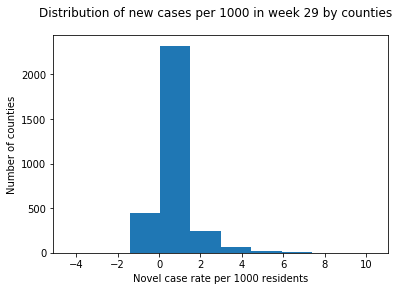

In [133]:
# show histograme for week 29
rate_w29_hist = plt.hist(covid_merged['rate_w29'])
plt.xlabel("Novel case rate per 1000 residents")
plt.ylabel("Number of counties")
plt.suptitle("Distribution of new cases per 1000 in week 29 by counties")
plt.show()

**Comment:** 
- Most counties showed an increase of 1 or 2 cases per thousand in week 29. 
- A few counties had more than 2, going up to a max of 10 cases per 1000. 
- Close to 400 counties had the same cases or saw a decrease in week 29 relative to the previous week.

**1.7** We did the steps above (and some other minimal processing) and saved the results in `covid_clean.csv` for you.  Use this data file to answer some exploratory questions and all future analyses: 

1. Has the overall average case rate increased from week 28 (July 5-11) to week 29 (July 12-18)?  
2. Treating the counties as separate and equal observations: in what states did the case rate increase the most?  In what states did the case rate decrease the most (or increse the least)?  List the top 5 for each.  Do you notice any patterns in these states?
3. Create and interpret separate visuals to display how the country case rate in week 29 relates to each of the following variables. Interpret what you see (be specific to this domain).

    a. The political views in the county (as measured by the votergap in the 2020 election).
    
    b. The vaccination rate in the county (for week 28) (be sure to throw away the zeros as these represent unreported values).
    
    c. The population density of the county.
    
    d. Whether 50% or more of the surveyed residents in the county report that they always wore a mask in public at the time of the survey.

In [128]:
# read the cleaned dataset
covid_clean = pd.read_csv('data/covid_clean.csv')

In [136]:
covid_clean.head()

,fips,date,county,state,cases_w30,deaths_w30,fully_w30,dose1_w30,cases_w26,deaths_w26,...,votergap16,never,rarely,sometimes,frequently,always,rate_w30,rate_w29,rate_w28,rate_w27
0,1001,2021-07-25,Autauga,Alabama,7419,113,26.0,34.0,7244,113,...,-49.479,5.3,7.4,13.4,29.5,44.4,0.001419,0.000946,0.000729,0.000355
1,1003,2021-07-25,Baldwin,Alabama,23810,325,31.4,40.5,21945,314,...,-57.786,8.3,5.9,9.8,32.3,43.6,0.005604,0.002974,0.001245,0.000545
2,1005,2021-07-25,Barbour,Alabama,2434,61,27.6,34.3,2344,60,...,-5.611,6.7,12.1,12.0,20.1,49.1,0.001345,0.000975,0.000605,0.000101
3,1007,2021-07-25,Bibb,Alabama,2801,65,22.5,29.4,2686,64,...,-55.544,2.0,3.4,9.6,27.8,57.2,0.003428,0.001158,0.000417,0.000324
4,1009,2021-07-25,Blount,Alabama,7184,139,19.3,24.2,6967,139,...,-81.382,5.3,11.4,18.0,19.4,45.9,0.001457,0.001303,0.000600,0.000360


In [145]:
covid_clean.columns

Index(['fips', 'date', 'county', 'state', 'cases_w30', 'deaths_w30',
       'fully_w30', 'dose1_w30', 'cases_w26', 'deaths_w26', 'fully_w26',
       'dose1_w26', 'cases_w27', 'deaths_w27', 'fully_w27', 'dose1_w27',
       'cases_w28', 'deaths_w28', 'fully_w28', 'dose1_w28', 'cases_w29',
       'deaths_w29', 'fully_w29', 'dose1_w29', 'population', 'hispanic',
       'minority', 'female', 'unemployed', 'income', 'nodegree', 'bachelor',
       'inactivity', 'obesity', 'density', 'votergap20', 'votergap16', 'never',
       'rarely', 'sometimes', 'frequently', 'always', 'rate_w30', 'rate_w29',
       'rate_w28', 'rate_w27'],
      dtype='object')

**1. Has the overall average case rate increased from week 28 (July 5-11) to week 29 (July 12-18)?**

In [144]:
covid_clean[['rate_w27','rate_w28','rate_w29','rate_w30']].describe()

,rate_w27,rate_w28,rate_w29,rate_w30
count,3108.000000,3108.000000,3108.000000,3108.000000
mean,0.000341,0.000461,0.000659,0.001064
std,0.000569,0.000848,0.000903,0.001269
min,0.000000,0.000000,0.000000,0.000000
25%,0.000054,0.000085,0.000142,0.000276
50%,0.000175,0.000239,0.000363,0.000650
75%,0.000402,0.000545,0.000825,0.001368
max,0.007573,0.022222,0.010346,0.014941


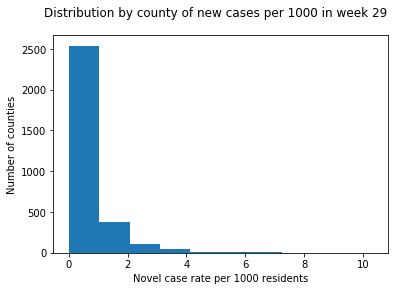

In [129]:
# plot novel cases per 1000 for w29
novel_case_rate_w29_hist = plt.hist(covid_clean['rate_w29']*1000)
plt.xlabel("Case rate per 1000 residents")
plt.ylabel("Number of counties")
plt.suptitle("Distribution by county of new cases per 1000 in week 29")
plt.show()

In [28]:
avg_covid_increase = covid_clean['rate_w29'].mean()
print("Average covid increase per 1000 in week 29:", avg_covid_increase *1000)

Average covid increase per 1000 in week 29: 0.6592153128754568


**Comment:**: On an average covid has increased by 0.66 per thousand. The histogram shows that overall rate of covid cases has increased for all counties.

**2. Treating the counties as separate and equal observations: in what states did the case rate increase the most? In what states did the case rate decrease the most (or increse the least)? List the top 5 for each. Do you notice any patterns in these states?**

In [158]:
# show the counties with the highest rate increase
covid_clean.sort_values('rate_w29', ascending=False)[['county', 'state', 'rate_w29']].head(5)

,county,state,rate_w29
385,Chattahoochee,Georgia,0.010346
2552,Dimmit,Texas,0.010131
149,Searcy,Arkansas,0.008182
1560,Taney,Missouri,0.008079
574,Carroll,Illinois,0.007620


In [163]:
# show the counties with the lowest rate increase
covid_clean.sort_values('rate_w29', ascending=True)[['county', 'state', 'rate_w29']].head(5)

,county,state,rate_w29
1553,Scotland,Missouri,0.0
1589,Granite,Montana,0.0
1597,McCone,Montana,0.0
1598,Madison,Montana,0.0
1599,Meagher,Montana,0.0


**Comment:** From the above data it looks like the northern states with small cities had the lowest increase in cases, and the southern states with largers cities had the highest increase in cases in week 29.

**Create and interpret separate visuals to display how the country case rate in week 29 relates to each of the following variables. Interpret what you see (be specific to this domain).**

**a. The political views in the county (as measured by the votergap in the 2020 election).**

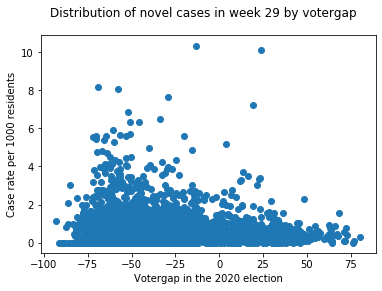

In [168]:
# plot novel cases per 1000 for w29 as a function of votergap
# plt.scatter(covid_clean['votergap20'],np.log(covid_clean['rate_w29']*1000))

plt.scatter(covid_clean['votergap20'],(covid_clean['rate_w29']*1000))
plt.xlabel("Votergap in the 2020 election")
plt.ylabel("Case rate per 1000 residents")
plt.suptitle("Distribution of novel cases in week 29 by votergap")
plt.show()

**Comment:** There seems to be a pattern between votergap in the 2020 elections and the covid novel case rate in week 29. Negative votergap seems to have higher case increase per 1000. There might be an issue in interprettimng the above graph as there might be equal number of counties between 0-2 for both positive and negative votergap and outliers might lead to the above conclusion. 

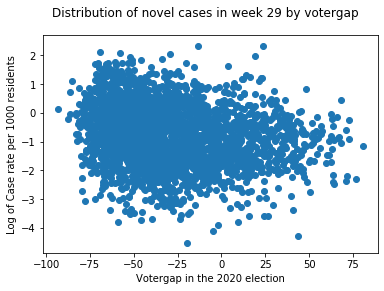

In [174]:
# show the logaritmic view to distribute the scatter more evenly
plt.scatter(covid_clean['votergap20'],np.log(covid_clean['rate_w29']*1000))
plt.xlabel("Votergap in the 2020 election")
plt.ylabel("Log of Case rate per 1000 residents")
plt.suptitle("Distribution of novel cases in week 29 by votergap")
plt.show()

**Comment:** A log transformation of the rate does not show any identifiable pattern.

**b. The vaccination rate in the county (for week 28) (be sure to throw away the zeros as these represent unreported values).**

In [169]:
print("Counties with unreported vaccination numbers in week 28:",
      len(covid_clean) - len(covid_clean[covid_clean.fully_w28 !=0]))

Counties with unreported vaccination numbers in week 28: 273


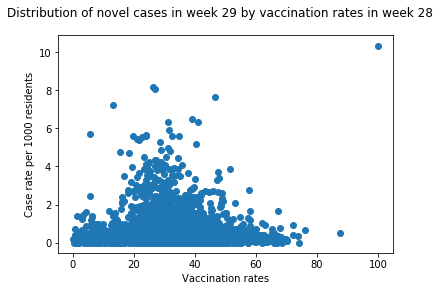

In [173]:
# plot novel cases per 1000 for w29 as a function of vaccination in the previous week
plt.scatter(covid_clean[covid_clean.fully_w28 !=0]['fully_w28'],covid_clean[covid_clean.fully_w28!=0]['rate_w29']*1000)
plt.xlabel("Vaccination rates")
plt.ylabel("Case rate per 1000 residents")
plt.suptitle("Distribution of novel cases in week 29 by vaccination rates in week 28")
plt.show()

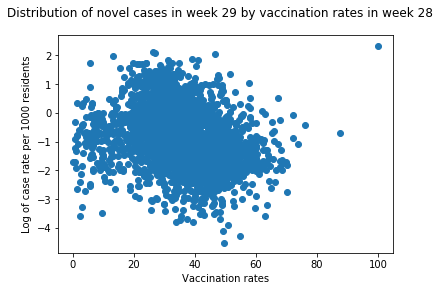

In [176]:
# plot novel cases per 1000 for w29 as a function of vaccination in the previous week
plt.scatter(covid_clean[covid_clean.fully_w28 !=0]['fully_w28'],
            np.log(covid_clean[covid_clean.fully_w28!=0]['rate_w29']*1000))
plt.xlabel("Vaccination rates")
plt.ylabel("Log of case rate per 1000 residents")
plt.suptitle("Distribution of novel cases in week 29 by vaccination rates in week 28")
plt.show()

**Comment:** In the first graph there seems to be an increase rates when the vacintaion rate is between 20 and 40% which is counter intutive. But with a log transform there doesn't seem to be a pattern between vaccination rates in week 28 and the covid case rate in week 29.

**c. The population density of the county.**

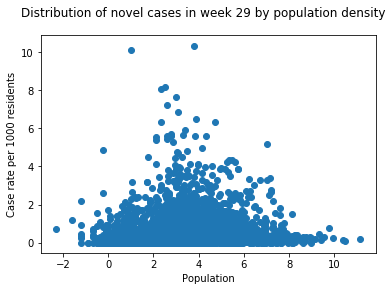

In [178]:
# plot novel cases per 1000 for w29 as a function of votergap
# show the logaritmic view to distribute the scatter more evenly
plt.scatter(np.log(covid_clean['density']),(covid_clean['rate_w29']*1000))
plt.xlabel("Population")
plt.ylabel("Case rate per 1000 residents")
plt.suptitle("Distribution of novel cases in week 29 by population density")
plt.show()

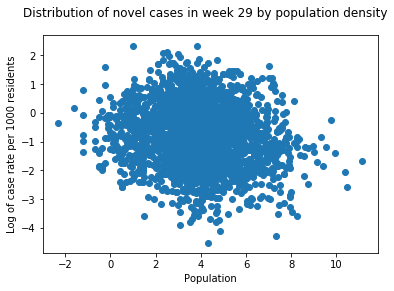

In [177]:
# plot novel cases per 1000 for w29 as a function of votergap
# show the logaritmic view to distribute the scatter more evenly
plt.scatter(np.log(covid_clean['density']),np.log(covid_clean['rate_w29']*1000))
plt.xlabel("Population")
plt.ylabel("Log of case rate per 1000 residents")
plt.suptitle("Distribution of novel cases in week 29 by population density")
plt.show()

**Comment:** In the first graph there seems to be an increase rates when the population density is between 2 and 6. Covid might be moving from large cities to tier two cities. But with a log transform there doesn't seem to be a pattern between population density and the covid case rate in week 29.

**d. Whether 50% or more of the surveyed residents in the county report that they always wore a mask in public at the time of the survey.**

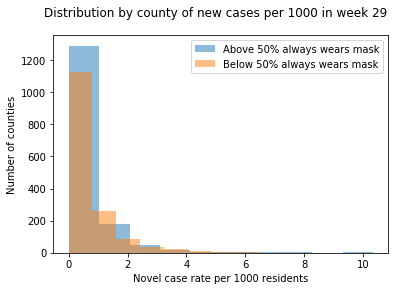

In [179]:
# plot novel cases per 1000 for w29 as a function of votergap
case_rate_w29_hist_above_50_masked = plt.hist(covid_clean[covid_clean.always>=50]['rate_w29']*1000, 
                                                    alpha=0.5, label='Above 50% always wears mask')
case_rate_w29_hist_below_50_masked = plt.hist(covid_clean[covid_clean.always<50]['rate_w29']*1000, 
                                                    alpha=0.5, label='Below 50% always wears mask')
plt.xlabel("Novel case rate per 1000 residents")
plt.ylabel("Number of counties")
plt.legend()
plt.suptitle("Distribution by county of new cases per 1000 in week 29")
plt.show()

**Comment:** For below 50% case rates seemes to be higher after 2 cases per 1000

---

## Question 2 [35pts]: Regression modeling 

**2.1** Fit a linear regression model to predict `rate_w29` (which represent the rate of new cases in the week of July 12-18) from `rate_w28` (July 5-11). Report the 95% confidence intervals for the coefficients, and carefully interpret the coefficients (including their statistical significances).  What does this model suggest about whether the rate of COVID infection increased from week 28 to week 29?


**2.2** Fit a linear regression model to predict `rate_w29` from `rate_w28` and `votergap20` along with the interaction between the two.  Interpret the coefficient estimates carefully (no need to mention significances).


**2.3** Create a scatterplot of `rate_w29` vs. `rate_w28`.  Add 3 separate predicted lines from your model in 2.2 to this scatterplot: the predicted line from the model in 2.2 for counties...
    1. where Biden was favored by 50 percentage points.
    2. where Biden and Trump were equal
    3. where Trump was favored by 50 percentage points.
Interpret what you see.


**2.4** Fit a linear regression model to assess the overall association of vaccination rate (`fully_w28`) on `rate_w29`.  Carefully interpret the results (including the statistical significance).  


**2.5** Many counties have the value zero for `fully_w28` which really represents a missing/unreported value for vaccinationr rate.  Comment on the effect of ignoring this issue can have on the intepretations and inferences in the model in 2.4.  What would be a better way of handling this issue?


**2.6** What factors could be confounded (whether mesured here or not) with the result seen in the model from 2.3 (list up to 3)?  Fit an appropriate linear model that controls for as many of these factors as possible (for those that are measured in this data set). Interpret the coefficient estimates from this model and compare to the results from 2.4.

**2.7** What major issue could arise if you fit a model to predict `rate_w29` from `rate_w28` and `rate_w27` (or from `fully_w28` and `fully_w27`) in a linear regression model?  Suggest and explain the use of two different approaches to account for this: one approach should be based on modeling and one approach should be based on feature engineering/variable transformations (not PCA). 

**2.8** The test set has a response variable that is `rate_w30`.  How would you use your models to predict `rate_w29` in this section in order to predict `rate_w30` instead?  Explain.  What could go wrong in this modification?

**Hint**: what should be the predictors to predict `rate_w30` instead of `rate_w29`? 


## Answers

**2.1** Fit a linear regression model to predict `rate_w29` (which represent the rate of new cases in the week of July 12-18) from `rate_w28` (July 5-11). Report the 95% confidence intervals for the coefficients, and carefully interpret the coefficients (including their statistical significances).  What does this model suggest about whether the rate of COVID infection increased from week 28 to week 29?


In [37]:
######
# your code here
######

**2.2** Fit a linear regression model to predict `rate_w29` from `rate_w28` and `votergap20` along with the interaction between the two.  Interpret the coefficient estimates carefully (no need to mention significances).


In [66]:
######
# your code here
######

**2.3** Create a scatterplot of `rate_w29` vs. `rate_w28`.  Add 3 separate predicted lines from your model in 2.2 to this scatterplot: the predicted line from the model in 2.2 for counties...
    1. where Biden was favored by 50 percentage points.
    2. where Biden and Trump were equal
    3. where Trump was favored by 50 percentage points.
Interpret what you see.




In [42]:
######
# your code here
######

*your answer here*

**2.4** Fit a linear regression model to assess the overall association of vaccination rate (`fully_w28`) on `rate_w29`.  Carefully interpret the results (including the statistical significance).  




In [43]:
######
# your code here
######

*your answer here*

**2.5** Many counties have the value zero for `fully_w28` which really represents a missing/unreported value for vaccinationr rate.  Comment on the effect of ignoring this issue can have on the intepretations and inferences in the model in 2.4.  What would be a better way of handling this issue?




*your answer here*

**2.6** What factors could be confounded (whether mesured here or not) with the result seen in the model from 2.3 (list up to 3)?  Fit an appropriate linear model that controls for as many of these factors as possible (for those that are measured in this data set). Interpret the coefficient estimates from this model and compare to the results from 2.4.



In [44]:
######
# your code here
######

*your answer here*

**2.7** What major issue could arise if you fit a model to predict `rate_w29` from `rate_w28` and `rate_w27` (or from `fully_w28` and `fully_w27`) in a linear regression model?  Suggest and explain the use of two different approaches to account for this: one approach should be based on modeling and one approach should be based on feature engineering/variable transformations (not PCA). 



*your answer here*

**2.8** The test set has a response variable that is `rate_w30`.  How would you use your models to predict `rate_w29` in this section in order to predict `rate_w30` instead?  Explain.  What could go wrong in this modification?

**Hint**: what should be the predictors to predict `rate_w30` instead of `rate_w29`? 


*your answer here*

---

## Question 3 [30pts]: Prediction modeling 

**3.1** Fit a well-tuned lasso model to predict `rate_w29` from the following set of predictors (along with all 2-way interactions among the main effects and all 2nd and 3rd order polynomial terms):

`['rate_w28','rate_w27','dose1_w28','hispanic','minority','female','unemployed', 'income','nodegree','bachelor','inactivity','obesity','density','cancer','votergap20']`

Report and explain the best choice of $\lambda$ (a visual can help with this), your estimate of out-of-sample $R^2$, along with the number of coefficients that shrunk exactly to zero (or numerically zero) and the number that are non-zero.

**3.2** Plot the trajectory curves of the main effects `['rate_w28','rate_w27','fully_w28','votergap20']` from this model: the estimates of the $\beta$ coefficients as a function of $\lambda$.  Interpret what you notice.

**3.3** Fit a well-tuned random forest model to predict `rate_w29` from the predictors listed in 3.1.  Report your choice of the tuning parameters and briefly justify your choices (a visual or table may be helpful for this).  Provide an estimate of out-of-sample $R^2$.  Note: do not go to crazy with the number of options for the parameters you are tuning...choose a set of values that are reasonable.

**3.4** Interpret the relationship between `rate_w29` and `dose1_w28` from the random forest model in 3.3.  Is there any evidence of interactive effects in this model involving `dose1_w28`?  How do you know?  Provide a reasonable visual (or a few visuals) to help you with these tasks and interpret what you see. 

**3.5** Fit a well-tuned boosting model to predict `rate_w29` from the predictors listed in 3.1.  Report your best choice of the tuning parameters and briefly justify your choice (a visual or table may be helpful for this).  Provide an estimate of out-of-sample $R^2$.  Note: again, do not go to crazy with the number of options for the parameters you are tuning...choose a set of values that are reasonable.

**3.6** Improve upon your favorite/best predictive model from 3.1, 3.3, or 3.5, by including other provided feature, by doing feature engineering, or by doing variable removal/selection.  Explain your choices.  Provide an estimate of out-of-sample $R^2$. 

**3.7** Evaluate your models from 3.1, 3.3, 3.5, and 3.6 on the test set (this will take some work...refer back to 2.8) using $R^2$.  How do these model's $R^2$ in test compare to the out-of-sample $R^2$ when tuning?  Explain whether this is surprising or not?



## Answers

**3.1** Fit a well-tuned lasso model to predict `rate_w29` from the following set of predictors (along with all 2-way interactions among the main effects and all 2nd and 3rd order polynomial terms):

`['rate_w28','rate_w27','dose1_w28','hispanic','minority','female','unemployed', 'income','nodegree','bachelor','inactivity','obesity','density','cancer','votergap20']`

Report and explain the best choice of $\lambda$ (a visual can help with this), your estimate of out-of-sample $R^2$, along with the number of coefficients that shrunk exactly to zero (or numerically zero) and the number that are non-zero.


In [45]:
######
# your code here
######

*your answer here*

**3.2** Plot the trajectory curves of the main effects `['rate_w28','rate_w27','fully_w28','votergap20']` from this model: the estimates of the $\beta$ coefficients as a function of $\lambda$.  Interpret what you notice.


In [46]:
######
# your code here
######

*your answer here*

**3.3** Fit a well-tuned random forest model to predict `rate_w29` from the predictors listed in 3.1.  Report your choice of the best tuning parameters and briefly justify your choice (a visual or table may be helpful for this).  Provide an estimate of out-of-sample $R^2$.  Note: do not go to crazy with the number of options for the parameters you are tuning...choose a set of values that are reasonable.


In [47]:
######
# your code here
######

*your answer here*

**3.4** Interpret the relationship between `rate_w29` and `dose1_w28` from the random forest model in 3.3.  Is there any evidence of interactive effects in this model involving `dose1_w28`?  How do you know?  Provide a reasonable visual (or a few visuals) to help you with these tasks and interpret what you see. 



In [48]:
######
# your code here
######

*your answer here*

**3.5** Fit a well-tuned boosting model to predict `rate_w29` from the predictors listed in 3.1.  Report your best choice of the tuning parameters and briefly justify your choice (a visual or table may be helpful for this).  Provide an estimate of out-of-sample $R^2$.  Note: again, do not go to crazy with the number of options for the parameters you are tuning...choose a set of values that are reasonable.



In [49]:
######
# your code here
######

*your answer here*

**3.6** Improve upon your favorite/best predictive model from 3.1, 3.3, or 3.5, by including other provided feature, by doing feature engineering, or by doing variable removal/selection.  Explain your choices.  Provide an estimate of out-of-sample $R^2$. 



In [50]:
######
# your code here
######

*your answer here*

**3.7** Evaluate your models from 3.1, 3.3, 3.5, and 3.6 on the test set (this will take some work...refer back to 2.8) using $R^2$.  How do these model's $R^2$ in test compare to the out-of-sample $R^2$ when tuning?  Explain whether this is surprising or not?

In [51]:
######
# your code here
######

*your answer here*

---

## Question 4 [10pts]: Going further

**4.1** Use all of the useable variables in `demo` and `masks` to create clusters of observations based on the $K$-means clustering approach.  Be sure to carefully select a reasonable choice for $K$.  Explain your choice (a visual may help with this).

**4.2** Use your created clusters and incorporate them as predictor(s) into a linear regression model to assess whether the relationships you measured in the model from 2.6 depend on cluster type.  Comment on what you notice.  Determine whether out-of-sample $R^2$ has improved using this model (in comparison to the model from 2.6) based on 5-fold CV.

**4.3: BONUS** Find data online to improve the prediction accuracy of your best model. Be sure to cite your source of your data and the approach you took into incorporating these new data.  Note: this is only worth up to 3 bonus points, so do not spend too much effor on this part over improving ealrier parts of the exam.

## Answers

**4.1** Use all of the useable variables in `demo` and `masks` to create clusters of observations based on the $K$-means clustering approach.  Be sure to carefully select a reasonable choice for $K$.  Explain your choice (a visual may help with this).

In [52]:
######
# your code here
######

*your answer here*

**4.2** Use your created clusters and incorporate them as predictor(s) into a linear regression model to assess whether the relationships you measured in the model from 2.6 depend on cluster type.  Comment on what you notice.  Determine whether out-of-sample $R^2$ has improved using this model (in comparison to the model from 2.6) based on 5-fold CV.


In [53]:
######
# your code here
######

*your answer here*

**4.3: BONUS** Find data online to improve the prediction accuracy of your best model. Be sure to cite your source of your data and the approach you took into incorporating these new data.  Note: this is only worth up to 3 bonus points, so do not spend too much effor on this part over improving ealrier parts of the exam.

In [54]:
######
# your code here
######



*your answer here*